In [1]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('Used Car Sales.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
#Check data types of columns
raw_data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [4]:
# Change year to object as it is categorical in this case
raw_data['Year'] = raw_data['Year'].astype('object')

In [5]:
#Confirm changes
raw_data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year             object
Model            object
dtype: object

In [6]:
#Check size of data 
raw_data.shape

(4345, 9)

In [7]:
###
#Preprocessing

In [8]:
# Check data summary
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.0,4345
unique,7,NaN,6,NaN,NaN,4,2,39.0,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,2008.0,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,419.0,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,NaN,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,NaN,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,NaN,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,NaN,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,NaN,NaN


In [9]:
data = raw_data.copy()

In [10]:
# Count does not tally indicating missing values in some fields. Next step is to eliminate missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [11]:
# drop all data points with missing values for price
data_full = data.dropna(axis = 0)

In [12]:
data_full.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [13]:
data_full.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.0,4025
unique,7,NaN,6,NaN,NaN,4,2,39.0,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,2008.0,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,393.0,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,NaN,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,NaN,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,NaN,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,NaN,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,NaN,NaN


In [14]:
####
#Exploratory analysis

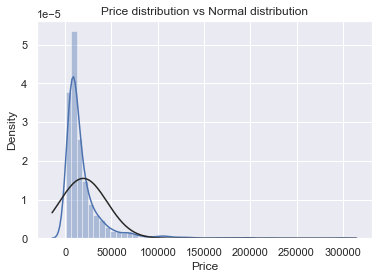

In [15]:
# Explore target variable
from scipy.stats import norm
(avge, std_dev) = norm.fit(data_full['Price'])
plt.figure()
sns.distplot(a = data_full['Price'], hist = True, kde = True, fit = norm)
plt.title('Price distribution vs Normal distribution')
plt.xlabel('Price')
plt.show()

In [16]:
# Since its skewed to the right, transform price 
data_full['Price'] = np.log(data_full['Price'])

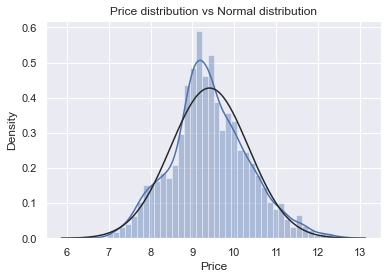

In [17]:
from scipy.stats import norm
(avge, std_dev) = norm.fit(data_full['Price'])
plt.figure()
sns.distplot(a = data_full['Price'], hist = True, kde = True, fit = norm)
plt.title('Price distribution vs Normal distribution')
plt.xlabel('Price')
plt.show()

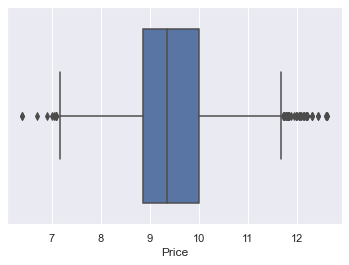

In [18]:
#Plot boxplot to 
sns.boxplot(data_full['Price'], orient = 'v')
plt.show()

In [19]:
# Remove with outliers
def outliers(x):
    sorted(data_full[x])
    Q1, Q3 = np.percentile(data_full[x], [25,75])
    IQR = Q3 - Q1
    lr = Q1 - (1.5 * IQR)
    ur = Q3 + (1.5 * IQR)
    return lr,ur

In [20]:
lr, ur = outliers('Price')

In [21]:
data1 = data_full.copy()

In [22]:
data1 = data1.drop(data1[(data1['Price']<lr) | (data1['Price']>ur)].index)

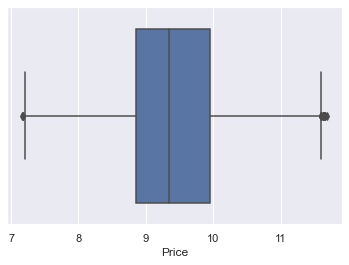

In [23]:
sns.boxplot(data1['Price'], orient = 'v')
plt.show()

In [24]:
# Google check shows engine volume always less than 6.5 so remove anything gretae than that
data2 = data1[data1['EngineV']<6.5]

In [25]:
clean_data = data2.reset_index(drop = True)

In [26]:
clean_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3939,3939.000000,3939,3939.000000,3939.000000,3939,3939,3939.0,3939
unique,7,NaN,6,NaN,NaN,4,2,39.0,297
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,2008.0,E-Class
freq,873,NaN,1503,NaN,NaN,1836,3577,391.0,187
mean,NaN,9.386946,NaN,165.168063,2.442485,NaN,NaN,NaN,NaN
std,NaN,0.880301,NaN,102.645673,0.944785,NaN,NaN,NaN,NaN
min,NaN,7.167616,NaN,0.000000,0.600000,NaN,NaN,NaN,NaN
25%,NaN,8.853665,NaN,93.000000,1.800000,NaN,NaN,NaN,NaN
50%,NaN,9.350102,NaN,160.000000,2.200000,NaN,NaN,NaN,NaN
75%,NaN,9.952278,NaN,230.000000,3.000000,NaN,NaN,NaN,NaN


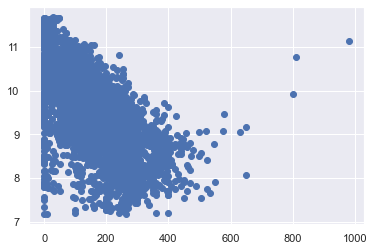

In [27]:
plt.scatter(clean_data['Mileage'], clean_data['Price'])
plt.show()

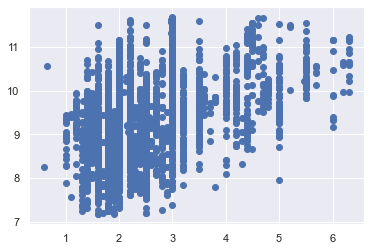

In [28]:
plt.scatter(clean_data['EngineV'], clean_data['Price'])
plt.show()

In [29]:
## Dummy variables for categorical variables
data_dummy = pd.get_dummies(clean_data, drop_first = True)
data_dummy.shape

(3939, 352)

In [30]:
data_dummy.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
## Split data into input and target variables
inputs = data_dummy.drop(['Price'], axis = 1)
target = data_dummy['Price']

In [32]:

from sklearn.model_selection import train_test_split

In [33]:
## Split data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [36]:
## Linear Model 

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
y_lr = lr.predict(x_train)

In [41]:
from sklearn.metrics import r2_score
sc_1 = r2_score(y_train, y_lr).round(2)
sc_1

0.95

In [42]:
np.set_printoptions(precision =2)
print(np.concatenate((y_lr.reshape(len(y_lr), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[ 9.42  9.35]
 [ 8.04  7.65]
 [ 8.96  8.96]
 ...
 [ 9.47  9.47]
 [ 9.67  9.79]
 [11.04 11.12]]


In [43]:
from sklearn.metrics import mean_squared_error
y_lr_mse = mean_squared_error(y_train, y_lr)
y_lr_rmse = np.sqrt(y_lr_mse).round(2)
y_lr_rmse

0.2

In [44]:
## Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [46]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
y_rfr = rfr.predict(x_train)
sc_2 = r2_score(y_train, y_rfr).round(2)
sc_2

0.98

In [48]:
np.set_printoptions(precision =2)
print(np.concatenate((y_rfr.reshape(len(y_rfr), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[ 9.32  9.35]
 [ 7.96  7.65]
 [ 8.87  8.96]
 ...
 [ 9.39  9.47]
 [ 9.77  9.79]
 [11.06 11.12]]


In [49]:
y_rfr_mse = mean_squared_error(y_train, y_rfr)
y_rfr_rmse = np.sqrt(y_rfr_mse).round(2)
y_rfr_rmse

0.13

In [50]:
## Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [51]:
y_sv = svr.predict(x_train)
sc_3 = r2_score(y_train, y_sv).round(2)
sc_3

0.42

In [52]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_sv.reshape(len(y_sv), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[ 9.62  9.35]
 [ 8.54  7.65]
 [ 8.66  8.96]
 ...
 [ 8.92  9.47]
 [ 9.12  9.79]
 [10.56 11.12]]


In [53]:
y_sv_mse = mean_squared_error(y_train, y_sv)
y_sv_rmse = np.sqrt(y_sv_mse).round(2)
y_sv_rmse

0.67

In [54]:
# XGBoost 

In [55]:
from xgboost import XGBRegressor

In [56]:
xgb = XGBRegressor()

In [57]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_xgb = xgb.predict(x_train)
sc_4 = r2_score(y_train, y_xgb).round(2)
sc_4

0.97

In [59]:
y_xgb_mse = mean_squared_error(y_train, y_xgb)
y_xgb_rmse = np.sqrt(y_xgb_mse).round(2)
y_xgb_rmse

0.14

In [60]:
Summary = pd.DataFrame()

In [61]:
Summary['Model'] = ['Linear Regression', 'Support Vector Regression', 'Random Forest', 'XGBoost']
Summary['R2'] = ([sc_1, sc_2, sc_3, sc_4])
Summary['Error'] = ([y_lr_rmse, y_sv_rmse, y_rfr_rmse, y_xgb_rmse])

In [62]:
Summary.sort_values(by = ['Error'], ascending = False, inplace = True)
Summary

,Model,R2,Error
1,Support Vector Regression,0.98,0.67
0,Linear Regression,0.95,0.20
3,XGBoost,0.97,0.14
2,Random Forest,0.42,0.13


In [63]:
# Use xgboost since it has a high r2 and second lowest error

In [64]:
y_pred = xgb.predict(x_test)

In [65]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

[[10.15 10.58]
 [11.02 10.84]
 [ 9.05  9.16]
 ...
 [ 8.    7.82]
 [ 8.09  8.07]
 [ 9.59  9.55]]


In [66]:
y_pred_mse = mean_squared_error(y_test, y_pred)
y_pred_rmse = np.sqrt(y_pred_mse).round(2)
y_pred_rmse

0.25

In [67]:
from sklearn.metrics import r2_score

In [68]:
pred_score = r2_score(y_test, y_pred).round(2)
pred_score

0.92